## Correlacion lineal simple
En esta lección, se cargan dos dataframes llamados df1 y df2, se seleccionan las columnas "sales" y "marketing_expense" para hacer la correlación de Pearson utilizando la función pearsonr de la librería scipy.stats. Se imprimen los valores de r y p obtenidos y se determina si hay relación lineal entre las ventas y los gastos en marketing basándose en el valor de p. Si p es menor a 0.05, se rechaza la hipótesis nula y se concluye que hay correlación (solo correlación, no podemos decir nada sobre causalidad) de lo contrario, no se puede rechazar la hipótesis nula con la evidencia existente. Pero esto no significa de forma categórica que no exista correlación entre las variables.

Existen muchas otras alternativas en estadistica para medir correlación, ademas de Pearson está Kendall y Spearman.
La principal diferencia entre estos tres métodos es que la correlación de Pearson se utiliza para medir relaciones lineales, mientras que las correlaciones de Kendall y Spearman se utilizan para medir relaciones no lineales.

In [9]:
# @title Libraries
## DataFrames & Statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# @title Create DataFrame step
df = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)

In [3]:
# @title Inspection step
df.sample(5)

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha
511,971.848998,0.429645,6.281898e+10,22426.163876,117.891190,13278.250214,-121.934268,572.021196,2.279706e+07,1.221060e+07,11.529597,10903.705887,-0.332285,1106.600871,10.666096,1537.879454,-43.716917,2.511345e+21,232.895611
364,10481.648479,1.731775,3.640898e+11,18628.905052,270.177346,6372.466117,-71.388676,11205.748562,5.308123e+06,9.588751e+06,7.890349,1198.354149,-1.429661,1310.495160,6.750923,16830.276276,-6.836732,6.515126e+22,792.342295
148,8836.598142,-0.949152,5.104632e+09,28323.083461,206.545820,10488.586935,-15.902535,3006.778083,1.426617e+07,3.736792e+07,10.119795,3450.206452,0.124999,1460.996620,8.705593,14186.505978,-54.344514,1.180762e+23,681.096022
360,117.750177,0.894151,9.454829e+11,34354.023945,387.108449,11582.572534,47.057434,4180.154896,1.734102e+07,3.820832e+07,6.931618,11469.961145,0.551883,494.921432,8.520821,155.515900,-43.251491,4.671370e+20,131.795987
160,6728.234966,-2.921413,1.762503e+10,27161.568997,192.754538,8505.738036,-32.153465,14476.536428,9.420394e+06,3.762235e+07,10.669897,2831.276287,-1.291254,413.549777,15.479180,10816.994814,-48.225979,3.582822e+19,938.660618


In [4]:
# @title Set auxiliaries variables
col1 = "height"
col2 = "slice"

In [5]:
# @title Pearson Correlation
## Hacer la correlacion de Pearson
r, p = pearsonr(df[col1], df[col2])

In [6]:
# @title Read the result of R Pearson
## Imprimir los resultados
print("Correlación de Pearson:", round(r,5))
print("p-value:", p)
if p < 0.05:
    print("Rechazamos la hipótesis nula, hay correlación entre las variables", col1 , "y", col2)
else:
    print("No podemos rechazar la hipótesis nula, no hay evidencia para sostener correlación entre las variables", col1 , "y", col2)

Correlación de Pearson: 0.96837
p-value: 0.0
Rechazamos la hipótesis nula, hay correlación entre las variables height y slice


#### Grafiquemos con un Scatterplot para demostrar visualmente el grado de correlación existente entre las variables.

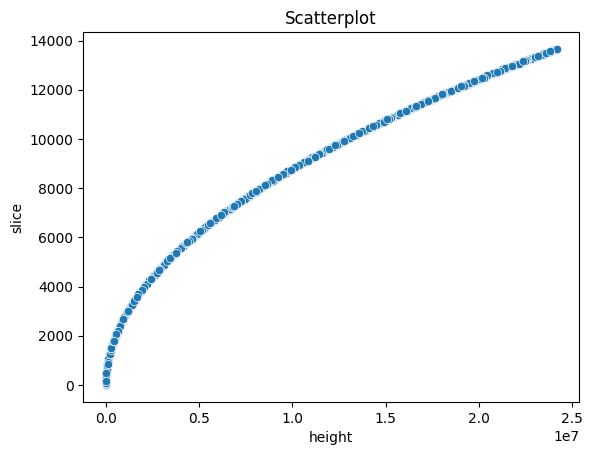

In [10]:
# @title Scaterplot for confirm the R Pearson Test

## Construyo mi Scatterplot
sns.scatterplot(data=df,
            x=col1,
            y=col2)

## Seteo el titulo y los nombres de los ejes
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Scatterplot')

## Muestro el gráfico resultante
plt.show()

## Correlacion lineal multidimensional
En esta lección, se carga un dataframe llamado df2, se seleccionan todas las columnas para hacer la correlación multiple de pearson. Se imprime el resumen del modelo obtenido, el cual incluye información sobre los coeficientes. A partir de esta información, se pueden determinar las relaciones lineales existentes entre las variables y su importancia en el modelo.
Para poder determinar si esta relacion es estadisticamente representativa se debera evaluar el p-value.

In [11]:
# @title Create DataFrame step
df2 = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)

In [12]:
# @title Inspection step
df2.sample(5)

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha
853,997.181644,-1.113015,8.804875e+11,20907.260346,280.839997,1572.604299,-16.358754,13640.505449,3.326559e+05,9.943263e+06,10.216948,1119.341788,0.222637,659.701183,6.597041,1572.438543,-25.356170,7.124322e+22,34.851604
801,2724.799934,1.177131,4.645132e+10,17288.696056,50.413768,11404.799875,13.495225,13801.844761,1.689530e+07,5.903160e+06,13.648595,12760.496382,-0.204101,274.624672,8.055777,4354.445197,5.603512,7.847802e+22,694.482341
914,1261.454149,-0.146066,7.323921e+11,18494.884153,459.883759,11350.100595,-37.912777,13273.825195,1.664128e+07,8.452324e+06,10.723627,5715.227482,-0.132981,294.941720,13.582239,2021.706698,-27.735976,2.059200e+23,721.341356
992,2099.916098,-1.207277,7.189627e+11,11704.491903,190.154373,13373.973954,-41.122709,12408.459795,2.318990e+07,2.863196e+07,5.800176,10482.306626,1.990678,26.308591,9.300349,3352.231620,-16.658831,1.595168e+22,11.131294
459,7763.162246,-0.218296,4.476671e+11,15725.118893,301.994815,4266.543838,36.749690,9475.017763,2.372731e+06,1.655230e+07,9.973987,12102.060037,-0.223481,1423.405174,10.391983,12458.551535,-2.064739,7.390234e+22,767.135402


In [28]:
# @title Multiple Linear Correlation
# Genero correlacion lineal multiple
corr = df2.corr()
corr

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha
arrow,1.000000,0.008855,-0.032312,-0.005742,-0.001800,-0.081613,-0.001206,0.007324,-0.075850,0.001543,-0.016616,-0.008380,0.008837,0.010067,0.002396,0.999998,-0.013033,0.027826,0.012277
under,0.008855,1.000000,-0.043922,-0.056518,-0.004184,-0.016642,-0.024853,-0.034171,-0.025094,-0.006928,-0.032366,-0.008614,0.021060,0.080350,-0.083942,0.008736,-0.020732,-0.029662,-0.023454
interior,-0.032312,-0.043922,1.000000,0.018710,0.019077,-0.022110,-0.015297,-0.006109,-0.019905,0.032598,0.038568,0.235197,-0.001307,0.013996,-0.019002,-0.032274,0.011137,0.001783,-0.020039
theta,-0.005742,-0.056518,0.018710,1.000000,-0.021270,-0.030138,0.041884,0.044125,-0.028556,0.704314,-0.023240,-0.012996,0.082427,0.019175,-0.012544,-0.005740,0.028181,0.063223,-0.027873
amb,-0.001800,-0.004184,0.019077,-0.021270,1.000000,0.070239,0.020501,-0.048998,0.069736,-0.004366,-0.042774,-0.042594,-0.004379,-0.002989,-0.005824,-0.001807,-0.019863,0.053905,-0.015781
slice,-0.081613,-0.016642,-0.022110,-0.030138,0.070239,1.000000,0.009228,-0.007473,0.968369,-0.012252,-0.013388,0.024050,0.031882,0.009067,0.019485,-0.081512,0.025231,0.040850,-0.018457
delta,-0.001206,-0.024853,-0.015297,0.041884,0.020501,0.009228,1.000000,0.012009,0.008318,0.034789,-0.047181,-0.032239,0.025609,0.006975,-0.050749,-0.001214,0.120078,0.043633,-0.037455
pi,0.007324,-0.034171,-0.006109,0.044125,-0.048998,-0.007473,0.012009,1.000000,-0.008081,0.043546,0.017584,0.006586,-0.015517,-0.026395,0.081593,0.007323,-0.026130,0.273811,-0.044256
height,-0.075850,-0.025094,-0.019905,-0.028556,0.069736,0.968369,0.008318,-0.008081,1.000000,-0.015910,-0.013896,0.026340,0.039289,0.010134,0.019315,-0.075739,0.016352,0.039822,-0.020775
nu,0.001543,-0.006928,0.032598,0.704314,-0.004366,-0.012252,0.034789,0.043546,-0.015910,1.000000,-0.026256,0.011670,0.015283,-0.035406,0.003099,0.001501,0.061448,0.061747,-0.031571


#### Se hace dificil comprender todos esos valores en forma de tabla dado que son muchos numeros flotantes. Pero lo importante es entender que mientras más se acerque a 1 el valor, estaremos más cerca de una fuerte correlación positiva entre ambas variables, mientras más se acerque a -1 estaremos más cerca de una fuerte correlación negativa entre las variables (mientras una sube la otra baja). Y mientras más se acerca a 0 estamos más cerca de la ausencia de correlación.

In [ ]:
# @title Correlation Map with colors
# Veo valores de correlacion
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha
arrow,1.000,0.009,-0.032,-0.006,-0.002,-0.082,-0.001,0.007,-0.076,0.002,-0.017,-0.008,0.009,0.010,0.002,1.000,-0.013,0.028,0.012
under,0.009,1.000,-0.044,-0.057,-0.004,-0.017,-0.025,-0.034,-0.025,-0.007,-0.032,-0.009,0.021,0.080,-0.084,0.009,-0.021,-0.030,-0.023
interior,-0.032,-0.044,1.000,0.019,0.019,-0.022,-0.015,-0.006,-0.020,0.033,0.039,0.235,-0.001,0.014,-0.019,-0.032,0.011,0.002,-0.020
theta,-0.006,-0.057,0.019,1.000,-0.021,-0.030,0.042,0.044,-0.029,0.704,-0.023,-0.013,0.082,0.019,-0.013,-0.006,0.028,0.063,-0.028
amb,-0.002,-0.004,0.019,-0.021,1.000,0.070,0.021,-0.049,0.070,-0.004,-0.043,-0.043,-0.004,-0.003,-0.006,-0.002,-0.020,0.054,-0.016
slice,-0.082,-0.017,-0.022,-0.030,0.070,1.000,0.009,-0.007,0.968,-0.012,-0.013,0.024,0.032,0.009,0.019,-0.082,0.025,0.041,-0.018
delta,-0.001,-0.025,-0.015,0.042,0.021,0.009,1.000,0.012,0.008,0.035,-0.047,-0.032,0.026,0.007,-0.051,-0.001,0.120,0.044,-0.037
pi,0.007,-0.034,-0.006,0.044,-0.049,-0.007,0.012,1.000,-0.008,0.044,0.018,0.007,-0.016,-0.026,0.082,0.007,-0.026,0.274,-0.044
height,-0.076,-0.025,-0.020,-0.029,0.070,0.968,0.008,-0.008,1.000,-0.016,-0.014,0.026,0.039,0.010,0.019,-0.076,0.016,0.040,-0.021
nu,0.002,-0.007,0.033,0.704,-0.004,-0.012,0.035,0.044,-0.016,1.000,-0.026,0.012,0.015,-0.035,0.003,0.002,0.061,0.062,-0.032


#### Otra opción es usar el heatmap de Seaborn para ver lo mismo:

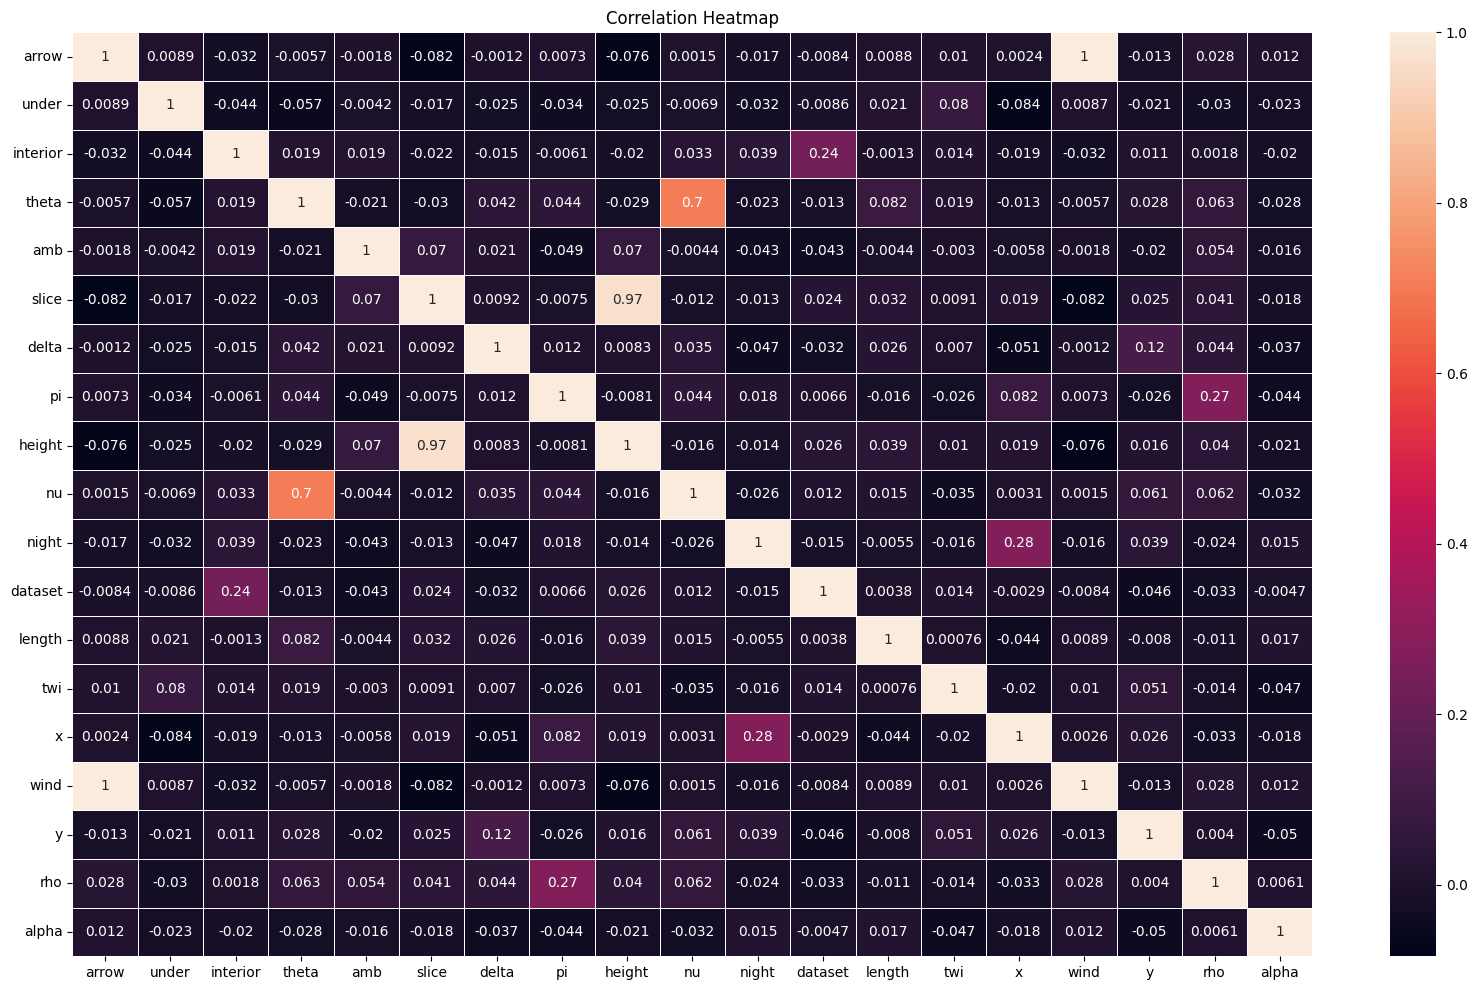

In [26]:
# @title Heatmap Seaborn

## Modifico las dimensiones por default de mi grafico para que entren todas mis relaciones.
plt.figure(figsize=(20,12))

## Armo mi heatmap
sns.heatmap(corr,
            annot=True,
            linewidth=.5)

## Seteo el titulo
plt.title("Correlation Heatmap")

## Giro las etiquets del eje Y para que entren bien
plt.yticks(rotation=360)

## Muestro el heatmap
plt.show()

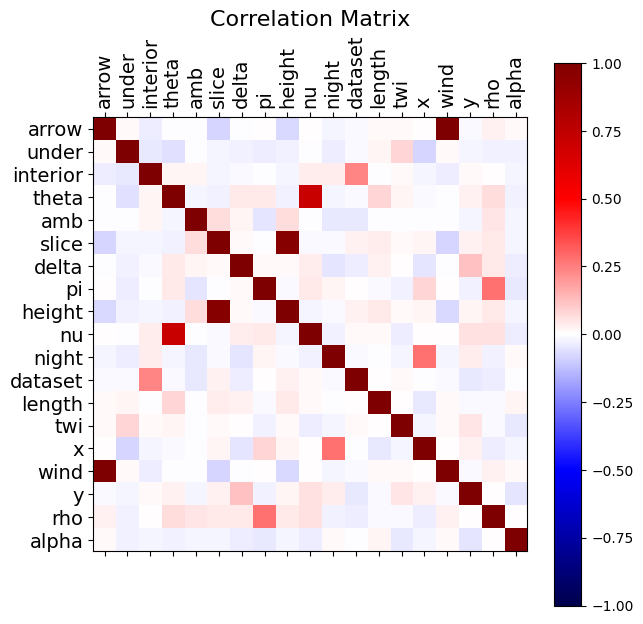

In [29]:
# @title Matshow Matplotlib

## Seteo tamaño de mi gráfico
f = plt.figure(figsize=(7, 7))

## Armo gráfico:
plt.matshow(corr,
            fignum=f.number,
            cmap='seismic',
            vmin=-1,
            vmax=1) #https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png

## Seteo el contenido y orientación de las etiquetas de mis ejes:
plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)

## Seteo color y titulo de mi gráfico
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

## Muestro el gráfico
plt.show()


## Challenges:

1. Encontrar el coeficiente de correlación de pearson entre las siguientes dos columnas del dataframe guardado en df2: "nu" y "theta".
2. ¿Es significativa la correlación encontrada? ¿Que nos dice el p_value? ¿Que podemos afirmar sobre ambas variables y la relación entre ellas?
3. Hagamos lo mismo ahora pero entre las columnas "y" y "delta".
4. ¿Que conclusiones podemos sacar?
5. Grafique un scatterplot de cada una de las relaciones solicitadas en el punto 1 y 3.